In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This dataset comes from the UCI repository of machine learning databases. The task is to predict if an individual's annual income excceds $50,000 based on census data. More details are available in the original UCI documentation

I will be exploring the data to explore some of the differences between the 2 income levels.  To start I will examine differences in hours worked and education levels.  I will then further explore if there are differences between gender and race.  And finally I will look at Public vs Private vs Self employed.  

In [245]:
income = pd.read_csv('adult.csv')

In [246]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [247]:
print(income.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [248]:
print(income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [249]:
print(income.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [250]:
def object_valcount(df):
    sel_df = df.select_dtypes(include =['object'])
    
    for col in sel_df.columns:
        print(col)
        print(sel_df[col].value_counts())
        print()

In [251]:
income['workclass'].replace('?','Not Reported',inplace = True)
income['occupation'].replace('?','Not Reported',inplace = True)
income['native-country'].replace('?','Not Reported',inplace = True)

object_valcount(income)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Not Reported         2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
E

## Visualizations

### Income by Hours Worked

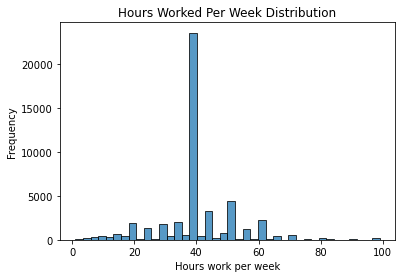

In [252]:
sns.histplot(x = 'hours-per-week', data = income, bins =40)

plt.title('Hours Worked Per Week Distribution')
plt.xlabel('Hours work per week')
plt.ylabel('Frequency')
plt.show()

In [253]:
income.groupby('income')['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,37155.0,38.840048,12.356849,1.0,35.0,40.0,40.0,99.0
>50K,11687.0,45.452896,11.091176,1.0,40.0,40.0,50.0,99.0


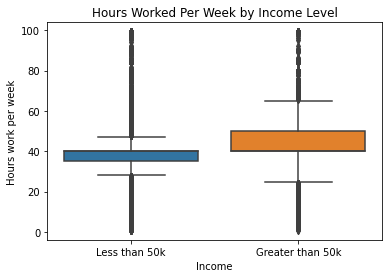

In [254]:
sns.boxplot(x = 'income', y = 'hours-per-week', data = income)

plt.title('Hours Worked Per Week by Income Level')
plt.ylabel('Hours work per week')
plt.xlabel('Income')
plt.xticks(ticks = [0,1],labels =['Less than 50k','Greater than 50k'])
plt.show()

The distribution shows that the most common hours worked per week is 40 hours. Looking at the box plot it looks like people who make more than 50k per year generally work more hours than those who make less than 50k per year.  It may be interesting to examine the composition of those who work more than 40 hours per week making less than 50k per year and those who make more than 50k per year but work less than 40 hours per week.

### Education

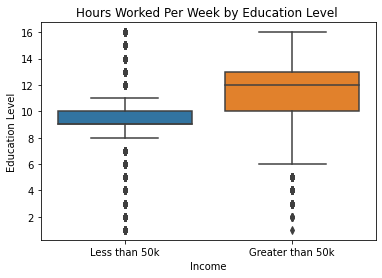

In [255]:
sns.boxplot(x = 'income', y = 'educational-num', data = income)

plt.title('Hours Worked Per Week by Education Level ')
plt.ylabel('Education Level')
plt.xlabel('Income')
plt.xticks(ticks = [0,1],labels =['Less than 50k','Greater than 50k'])
plt.show()

Looking at the above boxplot people who make less than 50k per year generally are less educated than those who make more than 50k per year.  It may be interesting to examine the composition of those who are highly educated who make less than 50k per year and those who are less educated making more than 50k per year.

### Gender

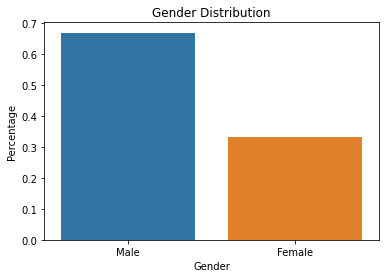

In [256]:
barpl = income['gender'].value_counts(normalize = True)
barpl = pd.DataFrame({'count':barpl})

sns.barplot(x = barpl.index, y = barpl['count'])

plt.title('Gender Distribution')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()



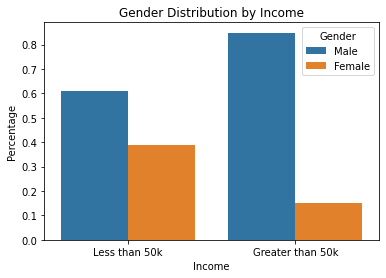

In [257]:
barpl = income.groupby('income')['gender'].value_counts(normalize = True)

barpl = pd.DataFrame({'count':barpl})
barpl.reset_index(level = ['income','gender'], inplace = True)
sns.barplot(x = 'income', y = 'count', hue = 'gender', data = barpl)

plt.title('Gender Distribution by Income')
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.xticks(ticks = [0,1],labels =['Less than 50k','Greater than 50k'])
plt.legend(title = 'Gender')
plt.show()

Looking at the distribution of genders compared to the distribution stratified by income there is interesting pattern.  We can see that the sample is comprised of about 65% male and 35% female. This is representative of those earning less than 50k per year.  However those making more than 50k per year is comprised of about 85% male and 15% female.  This is an interesting difference that we will examine further.

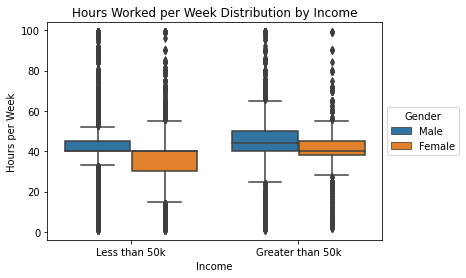

In [258]:
sns.boxplot(x = 'income', y = 'hours-per-week',hue = 'gender', data = income)

plt.title('Hours Worked per Week Distribution by Income')
plt.ylabel('Hours per Week')
plt.xlabel('Income')
plt.xticks(ticks = [0,1],labels =['Less than 50k','Greater than 50k'])
plt.legend(title = 'Gender', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Looking at the hours worked we can see that the female observations work slightly less hours per week.  But the female observations work similar hours per week even if it is slightly less.

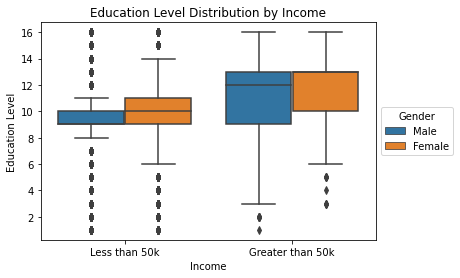

In [259]:
sns.boxplot(x = 'income', y = 'educational-num',hue = 'gender', data = income)

plt.title('Education Level Distribution by Income')
plt.ylabel('Education Level')
plt.xlabel('Income')
plt.xticks(ticks = [0,1],labels =['Less than 50k','Greater than 50k'])
plt.legend(title = 'Gender', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Looking at the education levels, the female observations are slightly more educated for both income levels.  Considering that the hours and education levels for both male and female observations it would be interesting to further explore the difference in earnings between genders.

### Race

In [260]:
income['race'].value_counts(normalize = True)

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64

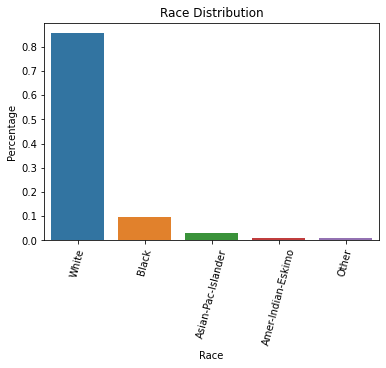

In [261]:
barpl = income['race'].value_counts(normalize =True)

barpl = pd.DataFrame({'count':barpl})

sns.barplot(x = barpl.index, y = barpl['count'])
plt.title('Race Distribution')
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.xticks(rotation = 75)
plt.show()


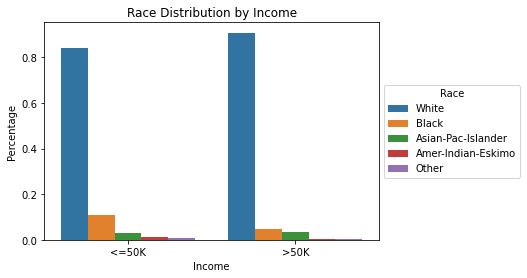

In [262]:
barpl = income.groupby('income')['race'].value_counts(normalize =True)

barpl = pd.DataFrame({'count':barpl})
barpl.reset_index(level = ['income','race'], inplace = True)
sns.barplot(x = 'income', y = 'count', hue = 'race', data = barpl)

plt.title('Race Distribution by Income')
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.legend(title = 'Race', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

It appears that White observations are slightly overrepresented for those making more than 50k per year and Non white observations are under represented. For example Black observations represent about 10% of the sample but when stratified by income Black observations only make up only 3%.

### Work class

In [263]:
income['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Not Reported         2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [264]:
inc_class = income.replace(value = 'Government', to_replace = ['Local-gov','State-gov','Federal-gov'])
inc_class.replace(value = 'Self-Employed', to_replace = ['Self-emp-not-inc','Self-emp-inc'], inplace = True)
inc_class=inc_class[inc_class['workclass'].isin (['Private','Government','Self-Employed'])]
print(inc_class['workclass'].value_counts(normalize = True))

Private          0.736895
Government       0.142332
Self-Employed    0.120773
Name: workclass, dtype: float64


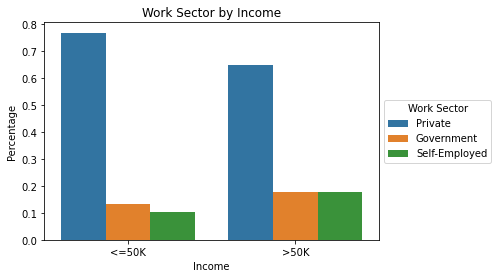

In [265]:
barpl = inc_class.groupby('income')['workclass'].value_counts(normalize = True)

barpl = pd.DataFrame({'count':barpl})
barpl.reset_index(level = ['income','workclass'], inplace = True)
sns.barplot(x = 'income', y = 'count', hue = 'workclass', data = barpl)

plt.title('Work Sector by Income')
plt.ylabel('Percentage')
plt.xlabel('Income')
plt.legend(title = 'Work Sector', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

While private sector workers account for 74% of the total sample, they account for about 65% of those making above 50k per year.  It appears that self employed workers make up a larger portion of those making more than 50k per year.

### Conclusions

There are some interesting trends that should be further examined.  The difference in income levels in gender despite minor differences in hours and education levels.  There are also differences in income levels between races that can be further explored.  More intuition can be gained by looking at a data set with a continous income variable rather than a binary variable.